<a href="https://colab.research.google.com/github/ymamathasai/DSDM-725/blob/main/Lab6/Lab6_Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns

df_country = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')

df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
df_country.shape[0]

167

In [ ]:
df_data = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv')

df_data

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [ ]:
df_country['exports'] = df_country['exports']*df_country['gdpp']/100
df_country['imports'] = df_country['imports']*df_country['gdpp']/100
df_country['health'] = df_country['health']*df_country['gdpp']/100

In [ ]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


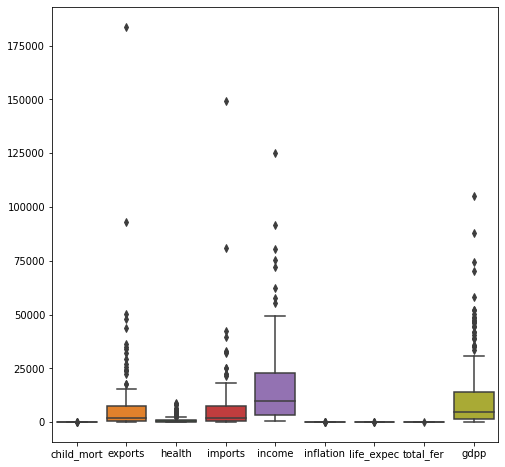

In [ ]:
#check outliers
fig = plt.figure(figsize = (8,8))
sns.boxplot(data=df_country)
plt.show()

In [ ]:
df_country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [ ]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

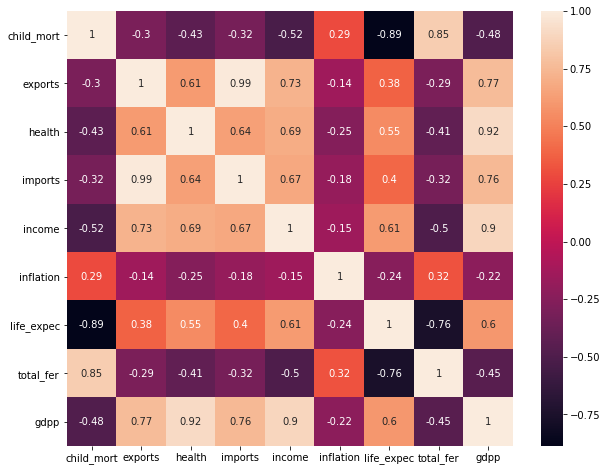

In [ ]:
%matplotlib inline
plt.figure(figsize = (10,8))
sns.heatmap(df_country.corr(),annot = True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
df_c = df_country.drop('country',1) ## Droping string feature country name.
standard_scaler = StandardScaler()
df_c_scaled = standard_scaler.fit_transform(df_c)

In [ ]:
df_c_scaled.shape

(167, 9)

In [ ]:
#fit pca on dataset
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(df_c_scaled)
#pca.explained_variance_ratio_

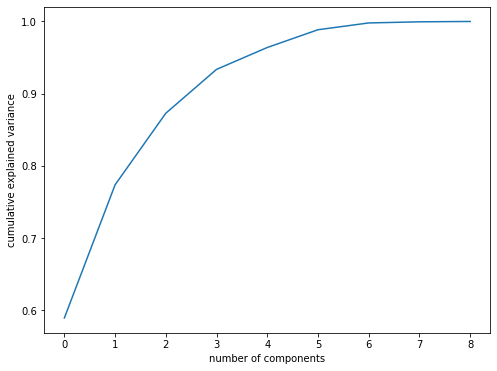

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
Most of the variance can be explained by 5 features and so a new dataframe is created with only the 5 features.

In [ ]:
colnames = df_c.columns.tolist()
pcs = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4]})
pcs

,Feature,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501


In [ ]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5
                           )

In [ ]:
df_pca = pca_final.fit_transform(df_c_scaled)

In [ ]:
df_pca.shape

(167, 5)

In [ ]:
pc = np.transpose(df_pca)

In [ ]:
pcs_2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

In [ ]:
pcs_2.shape

(167, 5)

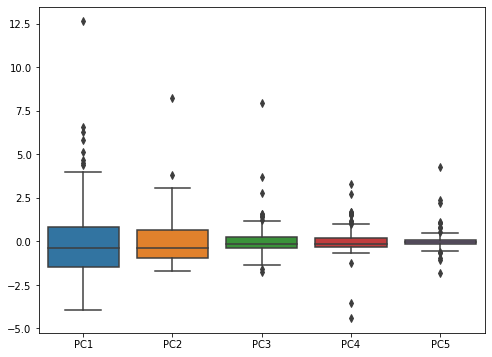

In [ ]:
fig = plt.figure(figsize = (8,6))
sns.boxplot(data=pcs_2)
plt.show()

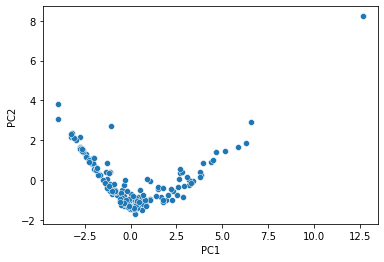

In [ ]:
fig = plt.figure(figsize = (6,4))
sns.scatterplot(x='PC1',y='PC2',data=pcs_2)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 50)
km.fit(pcs_2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [ ]:
km_cluster = pd.concat([df_post_pca , pd.Series(km.labels_)], axis=1)
km_cluster.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']
km_cluster

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0
...,...,...,...,...,...,...
162,-1.175606,-0.281249,-0.663619,-0.258950,-0.133251,0
163,-0.314505,-0.019143,3.680854,0.016772,-0.475066,0
164,-0.594560,-1.084130,0.528668,-0.478067,-0.373132,0
165,-1.802840,0.584669,1.179551,0.051510,-0.274608,2


In [ ]:
km_data['ClusterID'].value_counts()

0    91
2    48
1    28
Name: ClusterID, dtype: int64

In [ ]:
new_data = pd.merge(df_country,km_data['ClusterID'], left_index=True,right_index=True)
new_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [ ]:
Clus_gdpp = pd.DataFrame(new_data.groupby(["ClusterID"]).gdpp.mean())
Clus_child_mor = pd.DataFrame(new_data.groupby(["ClusterID"]).child_mort.mean())
Clus_exports = pd.DataFrame(new_data.groupby(["ClusterID"]).exports.mean())
Clus_income = pd.DataFrame(new_data.groupby(["ClusterID"]).income.mean())
Clus_health = pd.DataFrame(new_data.groupby(["ClusterID"]).health.mean())
Clus_imports = pd.DataFrame(new_data.groupby(["ClusterID"]).imports.mean())
Clus_inflation = pd.DataFrame(new_data.groupby(["ClusterID"]).inflation.mean())
Clus_life_expec = pd.DataFrame(new_data.groupby(["ClusterID"]).life_expec.mean())
Clus_total_fer = pd.DataFrame(new_data.groupby(["ClusterID"]).total_fer.mean())

In [ ]:
df = pd.concat([Clus_gdpp, Clus_child_mor, Clus_income, Clus_exports, Clus_health,
                Clus_imports, Clus_inflation, Clus_life_expec, Clus_total_fer], axis=1)

In [ ]:
df.columns = ["gdpp","child_mort","income","exports","health","imports","inflation","life_expec","total_fer"]
df

,gdpp,child_mort,income,exports,health,imports,inflation,life_expec,total_fer
ClusterID,,,,,,,,,
0,7979.912088,20.357143,13968.021978,3604.149434,547.279455,3710.446386,7.070549,73.460440,2.235055
1,48114.285714,5.046429,50178.571429,31038.239286,4327.163214,25818.100000,3.014679,80.514286,1.760714
2,1909.208333,91.610417,3897.354167,879.063521,114.821765,827.028771,11.911146,59.239583,4.992083


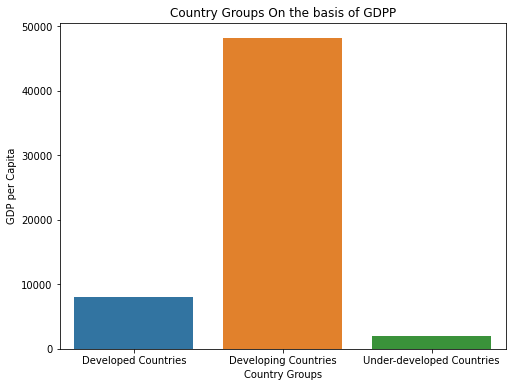

In [ ]:
fig = plt.figure(figsize = (8,6))
df.rename(index={0: 'Developed Countries'},inplace=True)
df.rename(index={1: 'Developing Countries'},inplace=True)
df.rename(index={2: 'Under-developed Countries'},inplace=True)
s=sns.barplot(x=df.index,y='gdpp',data=df)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('Country Groups On the basis of GDPP')
plt.show()

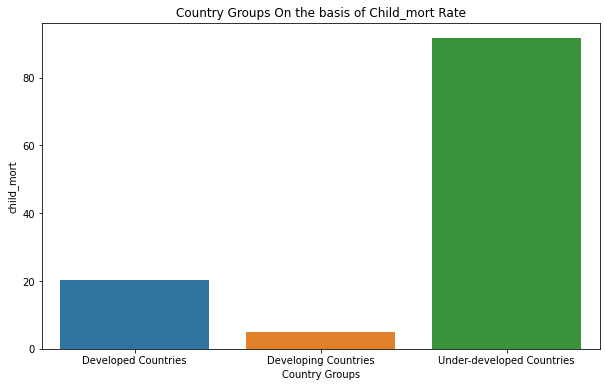

In [ ]:
####using child mortality
fig = plt.figure(figsize = (10,6))
sns.barplot(x=df.index,y='child_mort',data=df)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Child mortality Rate')
plt.show()

kmeans was used to group the data into 3 groups.